In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [70]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score

In [71]:
df = pd.read_csv('dataset.csv', usecols=range(1,10), index_col=0, parse_dates=True)
df.head()

,away_team_goals_difference,games_won_home_team,games_won_away_team,games_against_won,games_against_lost,League_21518.0,League_24558.0,home_player_1_overall_rating
home_team_goals_difference,,,,,,,,
-5.0,-8.0,2.0,1.0,0.0,0.0,1,0,77.0
4.0,-2.0,4.0,1.0,0.0,0.0,1,0,76.0
18.0,7.0,6.0,6.0,0.0,0.0,1,0,81.0
1.0,1.0,2.0,3.0,0.0,0.0,1,0,79.0
1.0,1.0,3.0,1.0,0.0,0.0,1,0,74.0


In [98]:
df_labels = pd.read_csv('labels.tsv', usecols = [1], sep = '\t', header = None)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df, df_labels,test_size=0.33, random_state=38)

In [113]:
lda = LinearDiscriminantAnalysis()
model = lda.fit(X_train, y_train)


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prana\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [114]:

print(model.priors_)

[0.28372093 0.25581395 0.46046512]


In [115]:
pred=model.predict(X_test)
print(np.unique(pred, return_counts=True))

(array(['Defeat', 'Draw', 'Win'], dtype='<U6'), array([32, 14, 61], dtype=int64))


In [116]:
print(confusion_matrix(pred, y_test))
print(classification_report(y_test, pred, digits=3))

[[13  7 12]
 [ 4  3  7]
 [12 12 37]]
             precision    recall  f1-score   support

     Defeat      0.406     0.448     0.426        29
       Draw      0.214     0.136     0.167        22
        Win      0.607     0.661     0.632        56

avg / total      0.472     0.495     0.481       107



In [117]:
lda.score(X_test, y_test)

0.4953271028037383

In [118]:
df_pred = lda.predict(X_test)
labels = ["Win", "Draw", "Defeat"]
cm = confusion_matrix(y_test, df_pred, labels)sni

In [119]:
cm = cm.astype('float') / cm.sum()

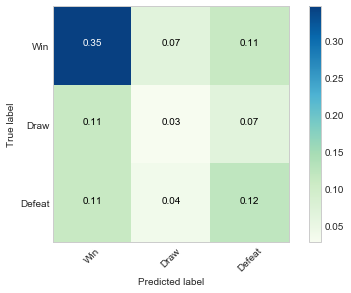

In [120]:
sns.set_style("whitegrid", {"axes.grid" : False})
fig = plt.figure(1)    
plt.imshow(cm, interpolation='nearest', cmap = plt.cm.GnBu)
#title= "Confusion matrix of a {} with {}".format(best_clf.base_estimator.__class__.__name__, best_dm_reduce.__class__.__name__)   
#plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, round(cm[i, j], 2),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
    
plt.show()

In [121]:
 print(model.coef_)

[[ 4.66678028e-02 -1.90982175e-01  6.80550220e-02 -4.43604572e-01
   3.93588014e-01  0.00000000e+00  0.00000000e+00 -1.29423784e-02]
 [-8.31612838e-03 -4.50977751e-03 -3.77735958e-05  3.06756274e-01
  -5.83352621e-02  0.00000000e+00  0.00000000e+00 -8.24732553e-02]
 [-2.41348375e-02  1.20181318e-01 -4.19119070e-02  1.02911958e-01
  -2.10105348e-01  0.00000000e+00  0.00000000e+00  5.37930720e-02]]


In [122]:
print(model.priors_)

[0.28372093 0.25581395 0.46046512]


In [123]:
print(model.means_)

[[ 4.36065574e+00  2.45901639e+00  3.88524590e+00  1.63934426e-02
   3.11475410e-01  1.00000000e+00  0.00000000e+00  7.52622951e+01]
 [-8.90909091e-01  2.89090909e+00  2.96363636e+00  1.27272727e-01
   1.81818182e-01  1.00000000e+00  0.00000000e+00  7.49636364e+01]
 [-2.34343434e+00  3.76767677e+00  2.76767677e+00  1.51515152e-01
   1.41414141e-01  1.00000000e+00  0.00000000e+00  7.72828283e+01]]
